In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("Classified Data", sep=",")

In [17]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [18]:
df.drop(["Unnamed: 0"],axis=1,inplace= True)

In [19]:
df["TARGET CLASS"].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [20]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [21]:
round(df.describe(),2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0
mean,0.95,1.11,0.83,0.68,1.03,0.94,0.96,1.07,1.16,1.36,0.5
std,0.29,0.26,0.29,0.23,0.24,0.26,0.26,0.29,0.29,0.20,0.5
min,0.17,0.44,0.17,0.05,0.32,0.26,0.30,0.30,0.37,0.64,0.0
25%,0.74,0.94,0.62,0.52,0.87,0.76,0.78,0.87,0.93,1.22,0.0
50%,0.94,1.12,0.81,0.68,1.04,0.94,0.95,1.07,1.17,1.38,0.5
75%,1.16,1.31,1.03,0.83,1.20,1.12,1.13,1.28,1.38,1.50,1.0
max,1.72,1.83,1.72,1.63,1.65,1.67,1.71,1.79,1.89,1.89,1.0


In [22]:
round(df.skew(),2)

WTT             0.07
PTI            -0.10
EQW             0.30
SBI             0.27
LQE            -0.03
QWG             0.06
FDJ             0.21
PJF            -0.02
HQE            -0.12
NXJ            -0.24
TARGET CLASS    0.00
dtype: float64

In [23]:
round(df.kurt(),2)

WTT            -0.51
PTI            -0.41
EQW            -0.41
SBI             0.18
LQE            -0.25
QWG            -0.41
FDJ            -0.17
PJF            -0.52
HQE            -0.69
NXJ             0.01
TARGET CLASS   -2.00
dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [25]:
X = df.drop("TARGET CLASS", axis=1)
y = df[["TARGET CLASS"]]

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 5)

In [27]:
X_train.shape

(800, 10)

In [28]:
y_train.shape

(800, 1)

In [29]:
error = []
for i in range(1,20):
    kn = KNeighborsClassifier(i)
    kn.fit(X_train,y_train)
    y_pred = kn.predict(X_test)
    accuracy = (1-accuracy_score(y_test,y_pred))
    error.append(accuracy)

In [30]:
error

[0.08999999999999997,
 0.11499999999999999,
 0.06999999999999995,
 0.06999999999999995,
 0.06000000000000005,
 0.06000000000000005,
 0.06999999999999995,
 0.06499999999999995,
 0.06999999999999995,
 0.06499999999999995,
 0.07499999999999996,
 0.06000000000000005,
 0.06999999999999995,
 0.06499999999999995,
 0.07499999999999996,
 0.06999999999999995,
 0.06999999999999995,
 0.06499999999999995,
 0.07499999999999996]

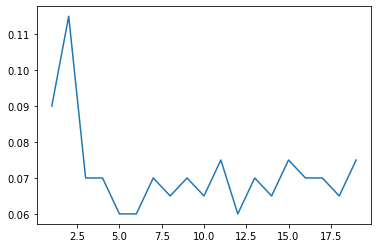

In [31]:
plt.plot(range(1,20),error);

In [32]:
knc = KNeighborsClassifier(n_neighbors= 5)
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
accuracy_score(y_train,knc.predict(X_train))

0.955

In [34]:
accuracy_score(y_test,knc.predict(X_test))

0.94

In [35]:
stf = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 5)

In [36]:
np.mean(cross_val_score(knc, X,y, cv = stf))

0.9349999999999999

In [37]:
np.std(cross_val_score(knc, X,y, cv = stf))

0.01746424919657295

In [38]:
#WITH USER DEFINED FUNCTION CREATE A TABULAR COLUMN WITH DATAS

In [39]:
## 1. Add train test split functionality in the code
## 2. Add type functionality where i can specify regression/classification
## 3. Make the model name dynamic

In [53]:
def model_builder(estimator,xx,yy,funct):
    Xtrain,Xtest,ytrain,ytest = train_test_split(xx,yy, test_size= 0.2,random_state= 5)
    estimator.fit(Xtrain,ytrain)
    mtea = accuracy_score(ytest,estimator.predict(Xtest))
    mtra = accuracy_score(ytrain,estimator.predict(Xtrain))
    if funct == "classifier":
        stf = StratifiedKFold(10, shuffle=True,random_state= 5)
        cvm = np.mean(cross_val_score(estimator, xx, yy, cv = stf))
        cvst = np.std(cross_val_score(estimator, xx, yy, cv= stf))
    else:
        cvm = np.mean(cross_val_score(estimator, xx, yy, cv = 10))
        cvst = np.std(cross_val_score(estimator, xx, yy, cv= 10))
    dico = [{"MODEL NAME": estimator,"TEST ACCURACY":mtea,"TRAIN ACCURACY":mtra,"CROSS VAL MEAN":cvm,"CROSS VAL STD":cvst}]
    return pd.DataFrame(dico)

In [55]:
model_builder(KNeighborsClassifier(),X,y,"classifier")

,MODEL NAME,TEST ACCURACY,TRAIN ACCURACY,CROSS VAL MEAN,CROSS VAL STD
0,KNeighborsClassifier(),0.94,0.955,0.935,0.017464
